# GTA San Andreas Auto Drive Car

- > Objective is to correctly predict the key pressed in a car in GTA San Andreas Game.

- > Traning Dataset is a 30 minute video recorded in 20fps

- > To get the key pressed in each frame, I developed a function on my own which displays the key pressed in each frame. From these images I train a CNN model to get the key pressed. So the video images and the key pressed becomes my train Dataset.

- > Model used is an InceptionV3 Model 

### 1 Getting the direction from the gameplay

    Following 2 cells cintain the code that i used to extract the directional information.
        This code outputs the keys pressed in each frame in a separate frame.The reason why I chose this method was all the    other methods described in the net would find only 1 button pressed in a frame. Also displayng the button pressed on screen helps me to cut the video without losing the button presss infomation

In [49]:
import win32api
import win32con
def get_dir():
    str1 = ''
    if(win32api.GetAsyncKeyState(win32con.VK_LEFT)!=0):
        str1 = str1+'L'
    if(win32api.GetAsyncKeyState(win32con.VK_RIGHT)!=0):
        str1 = str1+'R'
    if(win32api.GetAsyncKeyState(win32con.VK_UP)!=0):
        str1 = str1+'U'
    if(win32api.GetAsyncKeyState(win32con.VK_DOWN)!=0):
        str1 = str1+'D'
    return str1

In [50]:
import cv2  
import numpy as np
while(cv2.waitKey(10) != ord('q')):
    font = cv2.FONT_HERSHEY_SIMPLEX
    blank_image = np.ones((150,150,3), np.uint8)
    xx = get_dir()
    if(xx):
        cv2.putText(blank_image, xx ,(75,75), font, 1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Blank Image", blank_image)
cv2.destroyAllWindows()

In [51]:
#Split the video recorded into images of frames

#Code Used to split : https://gist.github.com/keithweaver/70df4922fec74ea87405b83840b45d57

import cv2
import numpy as np
import os

def video2img(file,path):
    # Playing video from file:
    cap = cv2.VideoCapture(file)

    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print ('Error: Creating directory of data')

    currentFrame = 0
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Saves image of the current frame in jpg file
        name = './'+path+'/frame' + str(currentFrame) + '.jpg'
        print ('Creating...' + name)
        cv2.imwrite(name, frame)

        # To stop duplicate images
        currentFrame += 1
        if not ret: break
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
video2img('train_direction.mp4','train_direction')

### Getting the directions from images

    For this task  I will use a simple CNN to classify images into the following:
    Luckily I already have a CNN model that I trained for NFS project, So i reuse it here
    
    0 : NONE = No key Pressed
    
    1 : U = Up
    
    2 : D = Down
    
    3 : L = Left
    
    4: R = Right
    
    5 : LU = Left+Upper
    
    6 : RU = Right+Upper
    
    7 : LD = Left+Down
    
    8 : RD = Right+Down

In [0]:
cv2.imshow('image',pp)
cv2.waitKey(0)

-1

In [0]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
import imutils

for i in tqdm(range(61253,61255)):
    image = cv2.imread("train_direction/frame"+str(i)+".jpg")
    imag = imutils.resize(image, height=500)
    gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV| cv2.THRESH_OTSU)[1]
    pp = thresh[150:300, 350:550]
    cv2.imwrite('dir_set/python_grey_1'+str(i)+'.png',pp)

In [0]:
image_data = []
labels = []
path = 'dir_set/'
for i in range(0,9):
    for filename in os.listdir(path+str(i)):
        image = cv2.imread(path+str(i)+'/'+filename,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(image,(56,56))
        image_data.append(img)
        labels.append(i)    

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

In [0]:

num_classes = 9
img_rows, img_cols = 56, 56

x_train = np.array(image_data).reshape(len(image_data), img_rows, img_cols,1)

x_train = x_train.astype('float32')
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
input_shape = (img_rows, img_cols, 1)
y_train = keras.utils.to_categorical(labels, num_classes)

x_train shape: (957, 56, 56, 1)
957 train samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (2, 2), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))




model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 27, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_1 (Dense)      

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [0]:
history = model.fit(x_train, y_train,batch_size=256,epochs=30,verbose=1,validation_data=(x_train, y_train),callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 957 samples, validate on 957 samples
Epoch 1/30
957/957 [==============================] - ETA: 15s - loss: 3.5010 - acc: 0.09 - ETA: 5s - loss: 2.1678 - acc: 0.4141 - ETA: 1s - loss: 1.6307 - acc: 0.574 - 11s 11ms/step - loss: 1.3904 - acc: 0.6499 - val_loss: 2.3275 - val_acc: 0.3271
Epoch 2/30
957/957 [==============================] - ETA: 2s - loss: 0.2898 - acc: 0.968 - ETA: 1s - loss: 0.2293 - acc: 0.982 - ETA: 0s - loss: 0.1913 - acc: 0.987 - 4s 5ms/step - loss: 0.1663 - acc: 0.9896 - val_loss: 0.0971 - val_acc: 1.0000
Epoch 3/30
957/957 [==============================] - ETA: 2s - loss: 0.0507 - acc: 1.000 - ETA: 1s - loss: 0.0453 - acc: 1.000 - ETA: 0s - loss: 0.0413 - acc: 1.000 - 4s 5ms/step - loss: 0.0388 - acc: 1.0000 - val_loss: 0.1068 - val_acc: 1.0000
Epoch 4/30
957/957 [==============================] - ETA: 2s - loss: 0.0234 - acc: 1.000 - ETA: 1s - loss: 0.0245 - acc: 1.000 - ETA: 0s - loss: 0.0247 - acc: 1.000

     We have a model That gives 100% accuracy and let's try it out on remaning dataset.

In [0]:
#Save the model
from sklearn.externals import joblib
joblib.dump(model, 'dir_model.pkl')

C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['dir_model.pkl']

In [0]:
#Predict the direction for the whole Dataset
from tqdm import tqdm
import numpy as np
import imutils
dir_img = []
for i in tqdm(range(0,61256)):
    image = cv2.imread("train_direction/frame"+str(i)+".jpg")
    imag = imutils.resize(image, height=500)
    gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV| cv2.THRESH_OTSU)[1]
    pp = thresh[150:300, 350:550]
    img = cv2.resize(pp,(56,56))
    dir_img.append(img)

100%|██████████| 61256/61256 [06:16<00:00, 188.03it/s]


In [0]:
#Predicting Direction
x_test = np.array(dir_img).reshape(len(dir_img), img_rows, img_cols,1)

x_test = x_test.astype('float32')
x_test /= 255
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'train samples')
input_shape = (img_rows, img_cols, 1)
#y_train = keras.utils.to_categorical(labels, num_classes)
out_dir = []
xx = model.predict(x_test)
for i in range(0,len(xx)):
    out = list(xx[i]).index(max(list(xx[i])))
    if(out==0):
        out_dir.append("None")
    elif(out==1):
        out_dir.append("U")
    elif(out==2):
        out_dir.append("D")
    elif(out==3):
        out_dir.append("L")
    elif(out==4):
        out_dir.append("R")
    elif(out==5):
        out_dir.append("LU")
    elif(out==6):
        out_dir.append("RU")
    elif(out==7):
        out_dir.append("LD")
    elif(out==8):
        out_dir.append("RD")

x_test shape: (61256, 56, 56, 1)
61256 train samples


In [0]:
import pandas as pd
cols = ['key_press']
df = pd.DataFrame(columns=cols)
df['key_press'] = out_dir
df.head()
df.to_csv('key_press.csv',index=False)

In [0]:
df['key_press'].value_counts()

None    31367
U       19238
R        2581
RU       2252
D        1939
L        1895
LU       1890
LD         79
RD         15
Name: key_press, dtype: int64

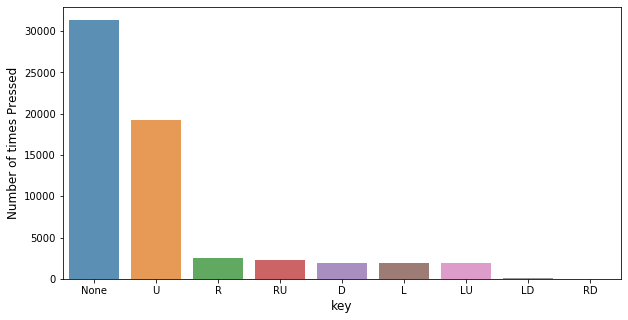

In [0]:
#Plot for frequency of key presses for each key
import seaborn as sns
import matplotlib.pyplot as plt
dir_counts = df['key_press'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(dir_counts.index, dir_counts.values, alpha=0.8)
plt.xlabel('key',fontsize=12)
plt.ylabel('Number of times Pressed',fontsize=12)
plt.show()

**Getting Train Video Frames**

In [ ]:
video2img('/content/drive/My Drive/train_video.mp4','train_images')

## Predicting Direction(Key Press)

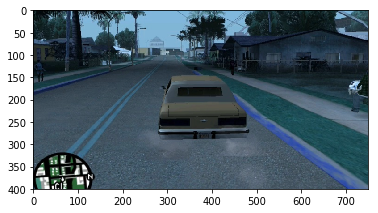

In [0]:
%matplotlib inline
import imutils

from matplotlib import pyplot as plt
image = cv2.imread("train_images/frame"+str(100)+".jpg")
image = imutils.resize(image, height=500)
image = image[55:455, 0:]
plt.imshow(image)
plt.show()

In [6]:
#from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
import cv2
import imutils
img_arr = []
for i in tqdm(range(0,61256)):
    image = cv2.imread("train_images/frame"+str(i)+".jpg")
    image = imutils.resize(image, height=500)
    image = image[55:455, 0:] #This is where the useful information is present. We need only this portion of image
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(image,(120,75))
    img_arr.append(img)


100%|██████████| 61256/61256 [06:59<00:00, 146.11it/s]


In [7]:
import pandas as pd
from keras.utils import to_categorical

df = pd.read_csv('/content/drive/My Drive/key_press.csv')
y = df['key_press'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_dir_train = enc.fit_transform(np.array(y).reshape(-1, 1))
enc.get_feature_names()

Using TensorFlow backend.


array(['x0_D', 'x0_L', 'x0_LD', 'x0_LU', 'x0_None', 'x0_R', 'x0_RD',
       'x0_RU', 'x0_U'], dtype=object)

In [0]:
ppp = y_dir_train.toarray()

In [9]:
import numpy as np
img_rows, img_cols = 120, 75

x_train = np.array(img_arr).reshape(len(img_arr), img_rows, img_cols,3)

x_train = x_train.astype('float32')
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
input_shape = (img_rows, img_cols, 3)

x_train shape: (61256, 120, 75, 3)
61256 train samples


In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(120, 75, 3))
base_model.summary()

W0905 05:01:07.848624 139724734130048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 05:01:07.883257 139724734130048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 05:01:07.906237 139724734130048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 05:01:07.960897 139724734130048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0905 05:01:07.962014 1397247341

87916544/87910968 [==============================] - 7s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 75, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 59, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 59, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 59, 37, 32)   0           batch_normalization_1[0][0]      
______________________

In [0]:
from keras.layers import Dense, Dropout, Flatten
incep_model = Model(base_model.input,base_model.layers[150].output)


x = incep_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(9, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 120, 75, 3)   0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 59, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 59, 37, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 59, 37, 32)   0           batch_normalization_95[0][0]     
___________________________________________________________________________________________

In [0]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [0]:
#,callbacks=[es]
history = model.fit(x_train, ppp,batch_size=512,epochs=200,verbose=1,validation_data=(x_train, ppp),callbacks=[es])

Train on 61256 samples, validate on 61256 samples
Epoch 1/200
61256/61256 [==============================] - 157s 3ms/step - loss: 0.3548 - acc: 0.8820 - val_loss: 4.0472 - val_acc: 0.2296
Epoch 2/200
61256/61256 [==============================] - 140s 2ms/step - loss: 0.1594 - acc: 0.9488 - val_loss: 0.2739 - val_acc: 0.9198
Epoch 3/200
61256/61256 [==============================] - 140s 2ms/step - loss: 0.1343 - acc: 0.9568 - val_loss: 2.9967 - val_acc: 0.4855
Epoch 4/200
61256/61256 [==============================] - 140s 2ms/step - loss: 0.1226 - acc: 0.9604 - val_loss: 1.7803 - val_acc: 0.6357
Epoch 5/200
61256/61256 [==============================] - 140s 2ms/step - loss: 0.1062 - acc: 0.9664 - val_loss: 7.2683 - val_acc: 0.2137
Epoch 6/200
61256/61256 [==============================] - 140s 2ms/step - loss: 0.1024 - acc: 0.9685 - val_loss: 6.6333 - val_acc: 0.0646
Epoch 7/200
61256/61256 [==============================] - 140s 2ms/step - loss: 0.1037 - acc: 0.9672 - val_loss: 7.

In [0]:
model.evaluate(x_train, ppp,verbose=1,batch_size = 512)

61256/61256 [==============================] - 32s 530us/step


[0.27386396338238067, 0.919844586699442]

In [0]:
#Save the model
from sklearn.externals import joblib
joblib.dump(model, '/content/drive/My Drive/incep_base_model.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/incep_base_model.pkl']

**I Have a Model that gives 91.98 ~ 92% accuracy on the train set, So using more layers in the existing model, evaluate the performance.**

In [0]:
from keras.layers import Dense, Dropout, Flatten
incep_model = Model(base_model.input,base_model.layers[200].output)


x = incep_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)



predictions = Dense(9, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 120, 75, 3)   0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 59, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 59, 37, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 59, 37, 32)   0           batch_normalization_95[0][0]     
___________________________________________________________________________________________

In [0]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [0]:
#,callbacks=[es]
history = model.fit(x_train, ppp,batch_size=512,epochs=200,verbose=1,validation_data=(x_train, ppp),callbacks=[es])

Train on 61256 samples, validate on 61256 samples
Epoch 1/200
61256/61256 [==============================] - 186s 3ms/step - loss: 0.1352 - acc: 0.9673 - val_loss: 3.5125 - val_acc: 0.4096
Epoch 2/200
61256/61256 [==============================] - 172s 3ms/step - loss: 0.0512 - acc: 0.9850 - val_loss: 0.1863 - val_acc: 0.9519
Epoch 3/200
61256/61256 [==============================] - 172s 3ms/step - loss: 0.0534 - acc: 0.9837 - val_loss: 1.9885 - val_acc: 0.6882
Epoch 4/200
61256/61256 [==============================] - 171s 3ms/step - loss: 0.0571 - acc: 0.9828 - val_loss: 2.2044 - val_acc: 0.4689
Epoch 5/200
61256/61256 [==============================] - 171s 3ms/step - loss: 0.0579 - acc: 0.9827 - val_loss: 1.1094 - val_acc: 0.6685
Epoch 6/200
61256/61256 [==============================] - 171s 3ms/step - loss: 0.0573 - acc: 0.9826 - val_loss: 0.3486 - val_acc: 0.9155
Epoch 7/200
61256/61256 [==============================] - 171s 3ms/step - loss: 0.0556 - acc: 0.9828 - val_loss: 0.

In [0]:
model.evaluate(x_train, ppp,verbose=1,batch_size = 512)

61256/61256 [==============================] - 40s 657us/step


[0.18633870376363765, 0.9519230770631949]

In [0]:
#Save the model
from sklearn.externals import joblib
joblib.dump(model, '/content/drive/My Drive/incep_base_model1.pkl')

['/content/drive/My Drive/incep_base_model1.pkl']

**I Have a Model that gives 95.19% accuracy on the train set** 

- > Now Plotting the Confusion Matrix to see the results 

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
  C = confusion_matrix(test_y, predict_y)
  print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
  
  A =(((C.T)/(C.sum(axis=1))).T)
  
  B =(C/C.sum(axis=0))
  
  labels = [0,1,2,3,4,5,6,7,8]
  cmap=sns.light_palette("green")
  print("-"*50, "Confusion matrix", "-"*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()
  print("-"*50, "Precision matrix", "-"*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()
  print("Sum of columns in precision matrix",B.sum(axis=0))
  
  print("-"*50, "Recall matrix" , "-"*50)
  plt.figure(figsize=(10,5))
  sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()
  print("Sum of rows in precision matrix",A.sum(axis=1))

In [0]:
y_ori = []
for i in list(df['key_press']):
  if(i == 'D'):
    y_ori.append(0)
  elif(i == 'L'):
    y_ori.append(1)
  elif(i == 'LD'):
    y_ori.append(2)
  elif(i == 'LU'):
    y_ori.append(3)
  elif(i == 'R'):
    y_ori.append(5)
  elif(i == 'RD'):
    y_ori.append(6)
  elif(i == 'RU'):
    y_ori.append(7)
  elif(i == 'U'):
    y_ori.append(8)
  else:
    y_ori.append(4)

In [0]:
df['key_press_num'] = y_ori
df['key_press'].value_counts()

None    31367
U       19238
R        2581
RU       2252
D        1939
L        1895
LU       1890
LD         79
RD         15
Name: key_press, dtype: int64

In [0]:
outy = model.predict(x_train)
y_pred = []
for i in range(0,len(outy)):
    out = list(outy[i]).index(max(list(outy[i])))
    y_pred.append(out)

Number of misclassified points  4.807692307692308
-------------------------------------------------- Confusion matrix --------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


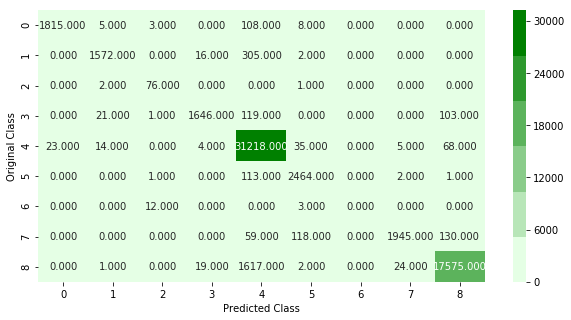

-------------------------------------------------- Precision matrix --------------------------------------------------


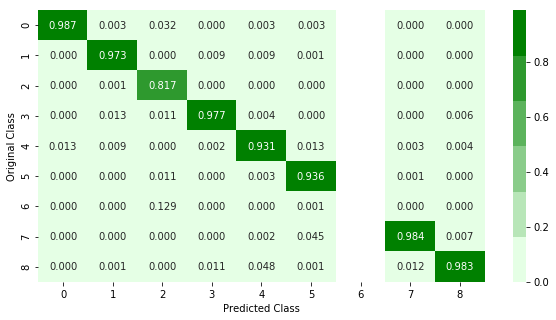

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1. nan  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


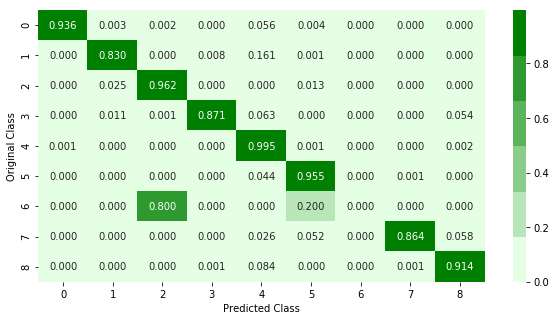

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
plot_confusion_matrix(y_ori,y_pred)

**So From the above it can be seen that the model faces issues in identifying 'RD' and 'LD' - The main reason for that is the dataset imbalance.**

**So I will add more layers to the inception net and then train the model again.**

In [0]:
y_model1 = []
for i in list(df['key_press']):
  if(i=='LD'):
    y_model1.append('Others')
  elif(i=='RD'):
    y_model1.append('Others')
  else:
    y_model1.append(i)

In [12]:
import pandas as pd
from keras.utils import to_categorical

df = pd.read_csv('/content/drive/My Drive/key_press.csv')
y = df['key_press'].values

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_dir_train = enc.fit_transform(np.array(y).reshape(-1, 1))
enc.get_feature_names()

array(['x0_D', 'x0_L', 'x0_LD', 'x0_LU', 'x0_None', 'x0_R', 'x0_RD',
       'x0_RU', 'x0_U'], dtype=object)

In [0]:
ppp = y_dir_train.toarray()

In [14]:
from keras.layers import Dense, Dropout, Flatten
incep_model = Model(base_model.input,base_model.layers[250].output)


x = incep_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='tanh',kernel_initializer='random_uniform')(x)
x = Dropout(0.5)(x)

#x = Dense(128, activation='relu')(x)
#x = Dropout(0.5)(x)


predictions = Dense(9, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

W0905 05:01:33.660056 139724734130048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 75, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 59, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 59, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 59, 37, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [15]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

W0905 05:01:33.867958 139724734130048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
# checkpoint

from keras.callbacks import ModelCheckpoint

filepath="/content/drive/My Drive/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [18]:
#,callbacks=[es]
history = model.fit(x_train, ppp,batch_size=512,epochs=200,verbose=1,validation_data=(x_train, ppp),callbacks=[es,checkpoint])

W0905 05:02:02.197413 139724734130048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 61256 samples, validate on 61256 samples
Epoch 1/200
61256/61256 [==============================] - 218s 4ms/step - loss: 1.1426 - acc: 0.6207 - val_loss: 0.9102 - val_acc: 0.6674

Epoch 00001: val_acc improved from -inf to 0.66741, saving model to /content/drive/My Drive/weights.best.hdf5
Epoch 2/200
61256/61256 [==============================] - 193s 3ms/step - loss: 0.6536 - acc: 0.7734 - val_loss: 0.8086 - val_acc: 0.7033

Epoch 00002: val_acc improved from 0.66741 to 0.70328, saving model to /content/drive/My Drive/weights.best.hdf5
Epoch 3/200
61256/61256 [==============================] - 193s 3ms/step - loss: 0.4385 - acc: 0.8468 - val_loss: 0.7156 - val_acc: 0.7696

Epoch 00003: val_acc improved from 0.70328 to 0.76956, saving model to /content/drive/My Drive/weights.best.hdf5
Epoch 4/200
61256/61256 [==============================] - 193s 3ms/step - loss: 0.3260 - acc: 0.8868 - val_loss: 0.6189 - val_acc: 0.7821

Epoch 00004: val_acc improved from 0.76956 to 0.78213,

In [19]:
#Save the model
from sklearn.externals import joblib
joblib.dump(model, '/content/drive/My Drive/incep_final_model.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/incep_final_model.pkl']

In [0]:
y_ori = []
for i in list(df['key_press']):
  if(i == 'D'):
    y_ori.append(0)
  elif(i == 'L'):
    y_ori.append(1)
  elif(i == 'LD'):
    y_ori.append(2)
  elif(i == 'LU'):
    y_ori.append(3)
  elif(i == 'R'):
    y_ori.append(5)
  elif(i == 'RD'):
    y_ori.append(6)
  elif(i == 'RU'):
    y_ori.append(7)
  elif(i == 'U'):
    y_ori.append(8)
  else:
    y_ori.append(4)

In [0]:
outy = model.predict(x_train)
y_pred = []
for i in range(0,len(outy)):
    out = list(outy[i]).index(max(list(outy[i])))
    y_pred.append(out)

Number of misclassified points  0.9648034478255192
-------------------------------------------------- Confusion matrix --------------------------------------------------


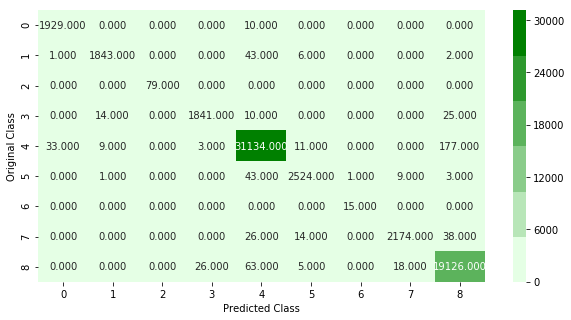

-------------------------------------------------- Precision matrix --------------------------------------------------


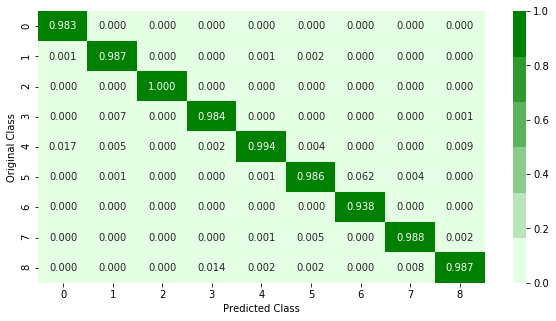

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


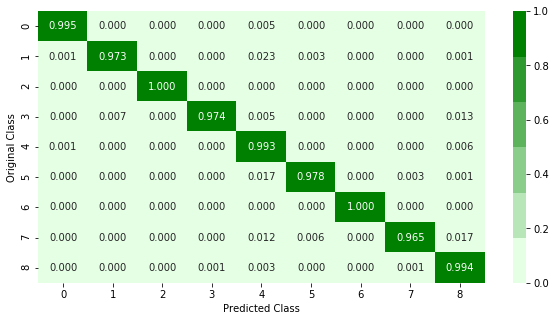

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
plot_confusion_matrix(y_ori,y_pred)

In [24]:
from keras.utils import plot_model
plot_model(model,to_file='mode_final.png',show_shapes=True)

**The model does a really good job here in identifying all the classes in the training set. Now evaluate thie model in a real game scenario**

## Testing on Test Video

- > The test video is completely Different from that of the train video used

Note: In the video the blue one in the main frame is the predicted key and the one in red is the original key.

In [2]:
from sklearn.externals import joblib 
# Load the pickled model 
incep_model =  joblib.load('incep_final_model.pkl') 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [ ]:
video2img('test_video.mp4','test_video')

In [ ]:
video2img('test_direction.mp4','test_direction')

In [69]:
from tqdm import tqdm
import cv2
import imutils
img_arr = []
for i in tqdm(range(0,6872)):
    image = cv2.imread("test_video/frame"+str(i)+".jpg")
    image = imutils.resize(image, height=500)
    image = image[130:498, 65:700]
    img = cv2.resize(image,(120,75))
    img_arr.append(img)


100%|██████████| 6872/6872 [00:39<00:00, 174.28it/s]


In [71]:
import numpy as np
img_rows, img_cols = 120, 75

x_test_key = np.array(img_arr).reshape(len(img_arr), img_rows, img_cols,3)

x_test_key = x_test_key.astype('float32')
x_test_key /= 255
print('x_test shape:', x_test_key.shape)
print(x_test_key.shape[0], 'test samples')
input_shape = (img_rows, img_cols, 3)

x_test shape: (6872, 120, 75, 3)
6872 test samples


In [72]:
key_out =  incep_model.predict(x_test_key)

In [73]:
key_list = []
for i in range(len(key_out)):
    out = list(key_out[i]).index(max(list(key_out[i])))
    
    if(out==0):
        key_list.append("D")
    elif(out==1):
        key_list.append("L")
    elif(out==2):
        key_list.append("LD")
    elif(out==3):
        key_list.append("LU")
    elif(out==4):
        key_list.append("_")
    elif(out==5):
        key_list.append("R")
    elif(out==6):
        key_list.append("RD")
    elif(out==7):
        key_list.append("RU")
    elif(out==8):
        key_list.append("U")
    

In [76]:
import cv2
import scipy.misc
import imutils
i = 0
while(cv2.waitKey(10) != ord('q')):
    try:
        image_load = scipy.misc.imread("test_video/frame" + str(i) + ".jpg", mode="RGB")
        #load original speed in each frame
        #speed_load = scipy.misc.imread("test_speed/frame" + str(i) + ".jpg", mode="RGB")
        dir_load = scipy.misc.imread("test_direction/frame" + str(i) + ".jpg", mode="RGB")
        
        image_load = imutils.resize(image_load, height=500)
        #speed_load = imutils.resize(speed_load, height=150)
        dir_load = imutils.resize(dir_load, height=150)
        
        #Writing the predicted speed into my main frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        #cv2.putText(image_load, str(int(speed_out[i])) ,(619,200), font, 1,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(image_load, str(key_list[i]) ,(570,200), font, 1,(0,0,255),2,cv2.LINE_AA)
        cv2.imshow("frame", cv2.cvtColor(image_load, cv2.COLOR_RGB2BGR))
        #cv2.imshow("Speed", cv2.cvtColor(speed_load, cv2.COLOR_RGB2BGR))
        cv2.imshow("Key", cv2.cvtColor(dir_load, cv2.COLOR_RGB2BGR))
   
        i+=1
    except:
        break
    #print(int(y_out[i]))
cv2.destroyAllWindows()

C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


## Test in real Game


In [48]:
import win32api
import win32con
import pyautogui
import time
import cv2
import numpy as np
import imutils
import keyboard
time.sleep(5)
press_arr = []
while(1):
    image = pyautogui.screenshot()
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    image = imutils.resize(image, height=500)
    image = image[126:460, 45:665]
    img = cv2.resize(image,(120,75))
    need_img = np.array(img).reshape(1, 120, 75,3)
    need_img = need_img.astype('float32')
    need_img/=255
    out = incep_model.predict(need_img)
    pred = list(out[0])
    xc = pred.index(max(pred))
    press_arr.append(xc)
    if(xc==0):
        keyboard.press('s')
        time.sleep(0.5)
        keyboard.release('s')
    
    elif(xc==1):
        keyboard.press('a')
        #keyboard.unhook(Key.left)
        time.sleep(0.5)
        keyboard.release('a')
    
    elif(xc==2):
        keyboard.press("a+s")
        time.sleep(0.5)
        keyboard.release('a+s')
    
    elif(xc==3):
        keyboard.press("a+w")
        time.sleep(0.5)
        keyboard.release('a+w')
    
    elif(xc==5):
        keyboard.press('d')
        time.sleep(0.5)
        keyboard.release('d')
    
    elif(xc==6):
        keyboard.press('d+s')
        time.sleep(0.5)
        keyboard.release('d+s')
    
    elif(xc==7):
        keyboard.press("d+w")
        time.sleep(0.5)
        keyboard.release('d+s')
    
    elif(xc==8):
        keyboard.press('w')
        time.sleep(0.5)
        keyboard.release('w')
    
    if(win32api.GetAsyncKeyState(win32con.VK_ESCAPE)!=0):
        break
    

In [32]:
cv2.imshow("Sample", imag)
cv2.waitKey(0)

-1

# Sumamry

    The model does a decent job in identifying the key pressed.
    
    However the model has some issue when it is dark. 
    
    Has some issue while predicting 'R' Key
    
    While running the code in real game, there might be issue with frame rates.